# Expedition to Data Science and Machine Learning
## Module 4: Machine Learning with Python
### Lecture 3: Supervised Learning: Linear Regression and Regression accuracy metrics

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Supervised Learning: Linear Regression
- Accuracy metric in Regression problem
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared or coefficient of determination
- Prediction result evaluation

#### References:
[1] Accuracy metrics in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html
<br>[2] Mean Absolute Error (MAE): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
<br>[3] Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
<br>[4] R-squared or coefficient of determination: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
<br>[5] MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better? https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

#### Import required Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Accuracy metrics in Supervised Learning: Regression

In [19]:
actual_value = [1,2,3,4,5,6,7,8,9,10]
predicted_value = [1,3,4,5,6,5,6,5,8,9]

**Mean absolute error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.

**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

In [20]:
df = pd.DataFrame({"actual":actual_value, "predicted":predicted_value})

# find the difference between the actual value and the predicted value
df["dif"] = df["actual"] - df["predicted"]

# find the absolute difference between the actual value and the predicted value
df["abs_error"] = np.abs(df["dif"])

# find the squared difference between the actual value and the predicted value
df["squared_error"] = df["dif"]**2

# find the actual value minus the mean of the actual values
df["actual_subtract_mean"] = df["actual"] - df["actual"].mean()

# find the square of actual value minus the mean of the actual values
df["squared_actual_subtract_mean"] = df["actual_subtract_mean"]**2

display(df)

,actual,predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
0,1,1,0,0,0,-4.5,20.25
1,2,3,-1,1,1,-3.5,12.25
2,3,4,-1,1,1,-2.5,6.25
3,4,5,-1,1,1,-1.5,2.25
4,5,6,-1,1,1,-0.5,0.25
5,6,5,1,1,1,0.5,0.25
6,7,6,1,1,1,1.5,2.25
7,8,5,3,3,9,2.5,6.25
8,9,8,1,1,1,3.5,12.25
9,10,9,1,1,1,4.5,20.25


In [21]:
# mean absolute error: lower is better
MAE = df["abs_error"].mean()
print("mean absolute error = ", MAE)

# mean absolute percentage error: : lower is better
MAPE = np.round(np.mean(df["abs_error"]/df["actual"]) * 100, 2)
print("mean absolute percentage error = ", MAPE, "%")

# mean squared error: lower is better
MSE = df["squared_error"].mean()
print("mean squared error = ", MSE)

# root mean squared error: lower is better
RMSE = np.round(np.sqrt(MSE),2)
print("root mean squared error = ", RMSE)

# coefficient of determination: higher is better
r_squared = np.round(1 - df["squared_error"].sum()/df["squared_actual_subtract_mean"].sum(), 2)
print("coefficient of determination = ", r_squared)

mean absolute error =  1.1
mean absolute percentage error =  21.79 %
mean squared error =  1.7
root mean squared error =  1.3
coefficient of determination =  0.79


In [22]:
# mean absolute error
MAE = mean_absolute_error(df["actual"], df["predicted"])
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(df["actual"], df["predicted"])
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(df["actual"], df["predicted"], squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(df["actual"], df["predicted"]) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1.1
mean squared error =  1.7
root mean squared error =  1.3038404810405297
coefficient of determination =  0.793939393939394


#### Load data

In [23]:
df = pd.read_csv("bmw.csv")

display(df.head(10))
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


(10781, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


#### One-hot Encoding

In [24]:
df = pd.get_dummies(df, drop_first=True)

#### Categorcial Encoding

In [25]:
# LE = LabelEncoder()

# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')

# display(df.head(10))
# print(df.info())

#### Separating the features and target variable

In [26]:
# only numeric features
# features = ['mileage']
# features = ['mileage', 'year']
# features = ['mileage', 'year', 'tax']
# features = ['mileage', 'year', 'tax', 'mpg']
# features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']

target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(10781, 34) (10781, 1)


#### Create train and test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8624, 34) (2157, 34) (8624, 1) (2157, 1)


#### Training with Linear Regression

In [28]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [29]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
33,fuelType_Petrol,-568.420640
28,transmission_Manual,-481.918302
3,mpg,-115.851588
5,model_ 2 Series,-110.456626
2,tax,-9.214945
1,mileage,-0.114830
29,transmission_Semi-Auto,923.351944
0,year,1755.193662
17,model_ X1,2387.749826
6,model_ 3 Series,2656.714375


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

In [30]:
model.intercept_

array([-3519303.32820086])

#### Prediction

In [31]:
y_pred = model.predict(X_test)

#### Prediction Error

In [32]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2821.980376044473
mean squared error =  18128757.31103843
root mean squared error =  4257.787842417519
coefficient of determination =  0.8598093284080559


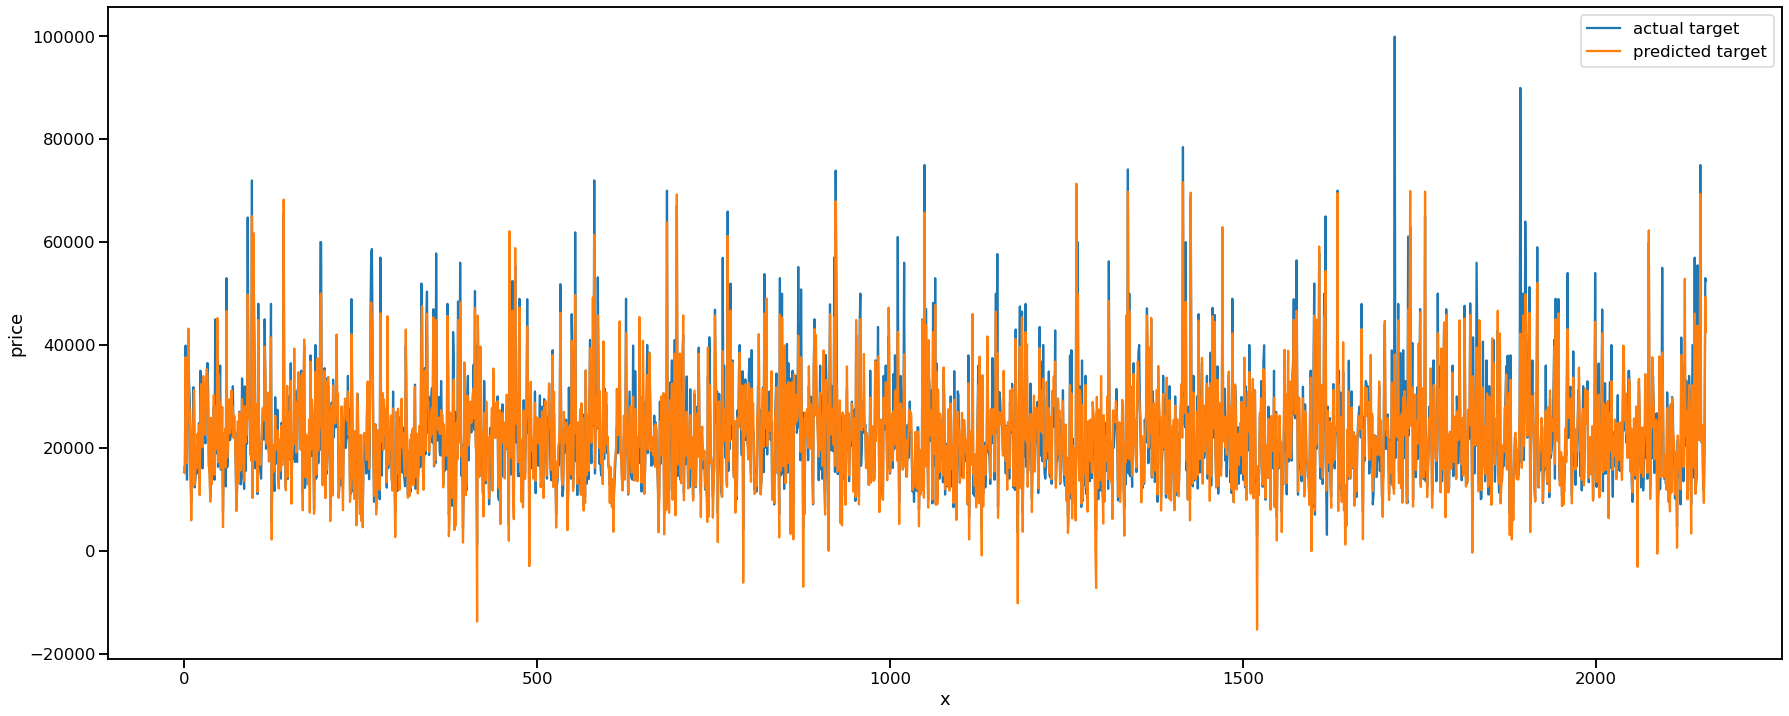

In [33]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

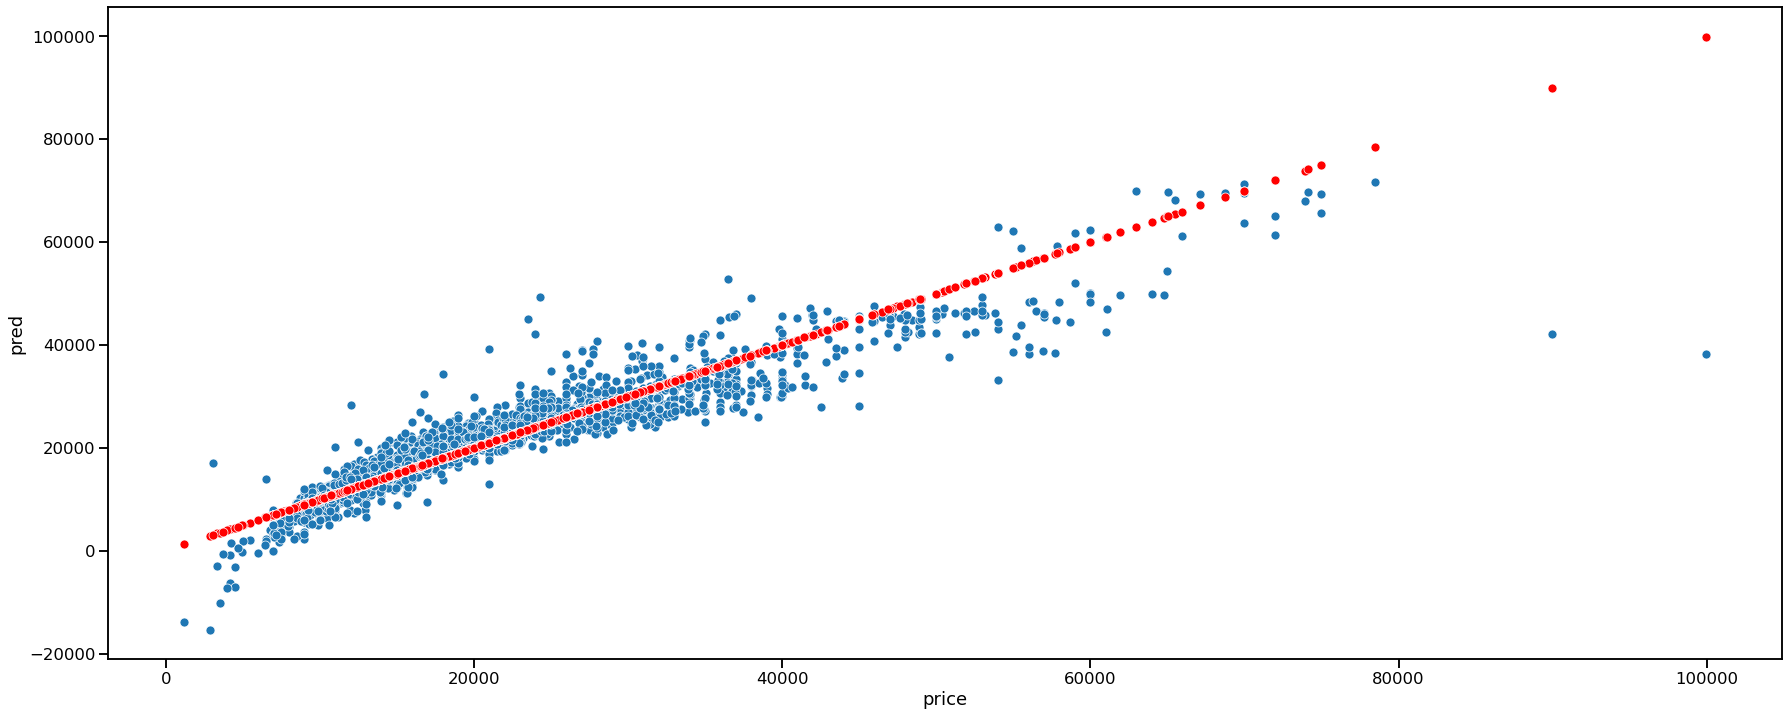

In [34]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()